A2 de Linguagens de Programação – 26/11/2018
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [46]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

Entre com o seu nome completo: João Vinícius
Olá, João Vinícius!
Bom trabalho!


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import random
import re
import string
import time
import pymysql
import sqlite3
import getpass
import pandas.io.sql as psql
import networkx as nx
from IPython.display import clear_output
%matplotlib inline

Questão 1 (1,0 ponto):  

Utilizando Python + SQL, crie uma tabela "aluno" em banco de dados no sqlite que tenha os seguintes campos:

+ id 
+ nome
+ data_nascimento
+ matricula

Escolha os tipos de dados apropriados. O campo id é chave primária, e deve ser autoincrementável. 

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [48]:
conn = sqlite3.connect('../../Dados/meudatabase.sqlite')
cur = conn.cursor()

In [49]:
cur.execute('''CREATE TABLE IF NOT EXISTS aluno (
ID integer NOT NULL PRIMARY KEY AUTOINCREMENT,
nome varchar(200) NOT NULL,
data_nascimento date NOT NULL,
matricula int NOT NULL 
);''')

cur.execute('PRAGMA table_info(aluno)')
for r in cur.fetchall():
    print(r)

(0, 'ID', 'integer', 1, None, 1)
(1, 'nome', 'varchar(200)', 1, None, 0)
(2, 'data_nascimento', 'date', 1, None, 0)
(3, 'matricula', 'int', 1, None, 0)


Questão 2 (1.5 ponto):  

Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos Python + SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [50]:
conn = sqlite3.connect('../../Dados/iris_database.sqlite')
cur = conn.cursor()

In [51]:
cur.execute('PRAGMA table_info(iris)')
for r in cur.fetchall():
    print(r)

(0, 'Id', 'INTEGER', 0, None, 1)
(1, 'SepalLengthCm', 'NUMERIC', 0, None, 0)
(2, 'SepalWidthCm', 'NUMERIC', 0, None, 0)
(3, 'PetalLengthCm', 'NUMERIC', 0, None, 0)
(4, 'PetalWidthCm', 'NUMERIC', 0, None, 0)
(5, 'Species', 'TEXT', 0, None, 0)
(6, 'AreaPetala', 'numeric', 0, None, 0)


In [52]:
cur.execute('SELECT * FROM iris')
for r in cur.fetchall():
    print(r)

(1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa', None)
(2, 4.9, 3, 1.4, 0.2, 'Iris-setosa', None)
(3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa', None)
(4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa', None)
(5, 5, 3.6, 1.4, 0.2, 'Iris-setosa', None)
(6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa', None)
(7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa', None)
(8, 5, 3.4, 1.5, 0.2, 'Iris-setosa', None)
(9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa', None)
(10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa', None)
(11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa', None)
(12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa', None)
(13, 4.8, 3, 1.4, 0.1, 'Iris-setosa', None)
(14, 4.3, 3, 1.1, 0.1, 'Iris-setosa', None)
(15, 5.8, 4, 1.2, 0.2, 'Iris-setosa', None)
(16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa', None)
(17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa', None)
(18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa', None)
(19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa', None)
(20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa', None)
(21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa', None)
(22, 5.1, 3.7, 1.5, 0.4, 'Iris-setosa', None)
(23, 4.6,

In [53]:
#a)
q = '''SELECT COUNT(*) FROM (SELECT DISTINCT species FROM iris)'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

(3,)


In [54]:
#b)
q = '''SELECT COUNT(*) FROM iris'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

(150,)


In [55]:
#c)
q = '''SELECT Species, AVG(PetalLengthCm * PetalWidthCm) as Media FROM iris GROUP BY Species ORDER BY Media DESC limit 1 
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)
#Ignora a tabela AreaPetala, ela não serviu para nada.
#E não é possível excluir uma coluna de uma tabela facilmente no SQLite (igual no MySQL)

('Iris-virginica', 11.296199999999994)


In [56]:
#d)
q = '''SELECT Species, AVG(PetalLengthCm * PetalWidthCm + SepalLengthCm * SepalWidthCm) as MediaTotal FROM iris
GROUP BY Species ORDER BY MediaTotal DESC limit 1
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

('Iris-virginica', 30.9808)


Questão 3 (1.5 pontos):  

Importe o arquivo ../../Dados/votesurvey.xls para um dataframe do Python usando o método apropriado, e responda às questões:  

a) Exiba as 15 primeiras linhas (essa é muito fácil!).  
b) Qual a média de salário desejado, dentre os eleitores de cada presidente?  
c) Qual fator tem maior influência sobre o salário atual? Sexo ou Idade?  
d) Crie uma nova coluna no dataframe original que exiba o salário atual dividido pela idade.  

In [57]:
#a)
vote = pd.read_excel('../../Dados/votesurvey.xls')
vote.head(15)

,Gender,Age,Salary before Stern,Expected salary,Candidate
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush
9,Male,26,120000,80000,Bush


In [58]:
#b)
vote['aux'] = range(1,vote.shape[0]+1)
df = vote.pivot(index='aux',columns='Candidate',values='Expected salary')
df.mean()['Bush':'Gore']

Candidate
Bush    111666.666667
Gore    103055.555556
dtype: float64

In [59]:
#c)
df2 = vote.pivot(index='aux',columns='Gender',values='Salary before Stern')
df2.describe()

Gender,Female,Male
count,14.000000,34.000000
mean,61500.000000,73705.882353
std,26711.420778,41454.998903
min,45000.000000,5000.000000
25%,49250.000000,48500.000000
50%,55500.000000,60000.000000
75%,60000.000000,97500.000000
max,150000.000000,225000.000000


Analisando esse banco de dados e a tabela de estatísticas criada pelo comando describe, vemos que em média os homens recebem mais que as mulheres (Na linha mean, o salário do homem é 73705 e o da mulher 61500). E também, em relação aos maiores salários, são mais de homens do que mulheres. Observando ainda o histograma abaixo, percebemos que a partir de um valor de salário, existem bem mais homens do que mulheres recebendo aquele valor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2b86f14a8>,
      dtype=object)

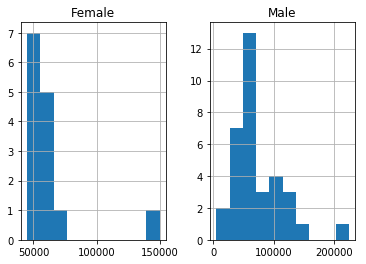

In [60]:
df2.hist()

In [61]:
df3 = vote.pivot(index='aux',columns='Age',values='Salary before Stern')
df3.describe()

Age,24,25,26,27,28,29,30,32,33
count,2.000000,10.000000,8.000000,9.000000,6.000000,7.000000,4.0,1.0,1.0
mean,57000.000000,54400.000000,74875.000000,60111.111111,69166.666667,79857.142857,96250.0,150000.0,60000.0
std,2828.427125,30970.236608,38200.364621,11826.288983,22003.787553,68457.842432,32500.0,NaN,NaN
min,55000.000000,5000.000000,48000.000000,45000.000000,45000.000000,25000.000000,50000.0,150000.0,60000.0
25%,56000.000000,45000.000000,53750.000000,50000.000000,52500.000000,43500.000000,87500.0,150000.0,60000.0
50%,57000.000000,47000.000000,58000.000000,60000.000000,65000.000000,50000.000000,105000.0,150000.0,60000.0
75%,58000.000000,57500.000000,75000.000000,65000.000000,85000.000000,86000.000000,113750.0,150000.0,60000.0
max,59000.000000,125000.000000,150000.000000,82000.000000,100000.000000,225000.000000,125000.0,150000.0,60000.0


Observando um pouco a tabela, vemos que um trabalhador novo (24, 25 anos) recebe menos na média e no valor máximo do que trabalhadores mais velhos (29,30,32 anos). Mas isso não é linear, pois a média salarial aos 26 anos é maior que aos 33 anos, por exemplo. Então a idade tem influencia, mas não tanta. E analisando ainda o histograma abaixo, vemos que o salário é geralmente alto na faixa de idade de 26 a 30 anos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2b8695278>,
      dtype=object)

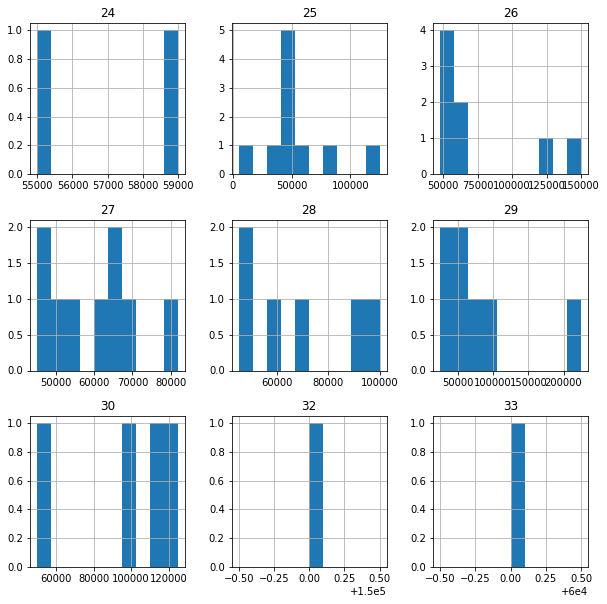

In [62]:
df3.hist(figsize=[10,10])

**Baseado nessas informações, não se pode concluir nada com muita certeza, mas parece realmente que o gênero tem mais influência no salário, e os homens ganham em média mais que as mulheres**

In [63]:
#d)
vote = vote.drop('aux',1)
vote['Salary/Age'] = vote['Salary before Stern']/vote['Age']
vote

,Gender,Age,Salary before Stern,Expected salary,Candidate,Salary/Age
0,Male,27,60000,110000,Bush,2222.222222
1,Male,30,125000,125000,Bush,4166.666667
2,Male,27,50000,120000,Bush,1851.851852
3,Male,26,56000,100000,Bush,2153.846154
4,Male,27,82000,100000,Bush,3037.037037
5,Male,32,150000,150000,Bush,4687.500000
6,Female,24,55000,100000,Bush,2291.666667
7,Male,30,110000,150000,Bush,3666.666667
8,Male,26,48000,80000,Bush,1846.153846
9,Male,26,120000,80000,Bush,4615.384615


Questão 4 (1.5 pontos): 

Transforme o arquivo ../../Dados/DomCasmurroMachadoAssis.txt em uma string no Python e responda, usando, quando possível, expressões regulares:  

a) Quais as 10 palavras mais frequentes que _começam_ com "a" ou "A"?  
b) Quantas palavras distintas que começam com letras _maiúsculas_ há no texto?  
c) Quantas palavras há no texto com apenas uma; com apenas duas; e com apenas 3 vogais?  

In [64]:
with open('../../Dados/DomCasmurroMachadoAssis.txt') as f:
    texto = f.read()

In [65]:
#a)
texto1 = re.findall(r'\b[Aa]{1}[A-ZÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛÇa-zâãáàäéêèëíìïîõôóòöùúüûç]*\b',texto)
L = [(x,texto1.count(x)) for x in texto1]
L = list(set(L))
L = sorted(L,key=lambda x: x[1],reverse=True)
L[0:9]

[('a', 2414),
 ('as', 543),
 ('ao', 330),
 ('A', 257),
 ('ainda', 129),
 ('assim', 120),
 ('agora', 118),
 ('até', 97),
 ('aos', 85)]

In [66]:
#b) Considerando que começa com letra maiúscula e não possui mais nenhuma letra maiúscula:
len(set(re.findall(r'\b[A-ZÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛÇ]{1}[a-zâãáàäéêèëíìïîõôóòöùúüûç\'-]*',texto)))

#Considerando que começa com letra maiúscula e pode possuir mais de uma letra maiúscula:
#len(set(re.findall(r'\b[A-ZÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛÇ]{1}[A-ZÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛÇa-zâãáàäéêèëíìïîõôóòöùúüûç\'-]*',texto)))

1341

In [67]:
#c)
#1 vogal:
len(re.findall(r'\b[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyzÇ\'-]*[AEIOUÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛaeiouâãáàäéêèëíìïîõôóòöùúüû]{1}[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyzç\'-]*\b',texto))

23473

In [68]:
#2 vogais:
len(re.findall(r'\b[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyzÇ\'-]*[AEIOUÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛaeiouâãáàäéêèëíìïîõôóòöùúüû]{1}[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyzç\'-]*[AEIOUÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛaeiouâãáàäéêèëíìïîõôóòöùúüû]{1}[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyzç\'-]*\b',texto))

24945

In [69]:
#3 vogais:
len(re.findall(r'\b[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyzÇ\'-]*[AEIOUÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛaeiouâãáàäéêèëíìïîõôóòöùúüû]{1}[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyzç\'-]*[AEIOUÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛaeiouâãáàäéêèëíìïîõôóòöùúüû]{1}[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyzç\'-]*[AEIOUÂÃÁÀÄÉÊÈËÍÌÏÎÕÔÓÒÖÙÚÜÛaeiouâãáàäéêèëíìïîõôóòöùúüû]{1}[BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyzç\'-]*\b',texto))

13778

Questão 5 (1.5 pontos):    

Utilizando apenas o Shell Linux, e utilizando o arquivo ../../Dados/DomCasmurroMachadoAssis.txt, diga os comandos para responder às seguintes perguntas:  

a) Quais as 10 palavras mais frequentes que _terminam_ com "a" ou "A"?  
b) Quantas palavras distintas que começam com _minúsculas_ há no texto?   
c) Como ordenar as palavras distintas por ordem de "rima"?  

In [70]:
#a)
! cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | grep -i 'a$' | sort | uniq -c | sort -nr | sed 10q

   2742 a
    625 da
    532 para
    468 era
    398 uma
    312 minha
    309 na
    257 A
    177 ella
    170 casa
sort: write failed: 'standard output': Broken pipe
sort: write error


In [71]:
#b)
! cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | grep '^[a-z]' | sort | uniq | wc -l

8535


In [72]:
#c)
! cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | tr '[A-Z]' '[a-z]' | rev | sort | rev | uniq 


]
a
acaba
saiba
amba
emba
barba
corityba
ca
fraca
casaca
sobrecasaca
ressaca
pataca
vacca
secca
bocca
rabeca
bibliotheca
boneca
dedica
fatidica
indica
fica
significa
gratifica
scientifica
justifica
logica
seraphica
philosophica
encyclica
catholica
plica
treplica
explica
polemica
astronomica
monica
unica
communica
rica
america
rhetorica
tisica
musica
physica
metaphysica
dramatica
pratica
prophetica
arithmetica
poetica
politica
critica
identica
botica
ecclesiastica
fantastica
mystica
therapeutica
banca
creanca
branca
franca
nunca
boca
troca
toca
voca
evoca
equivoca
cerca
perca
forca
casca
fresca
risca
marisca
tosca
educa
manduca
tijuca
maluca
nuca
pouca
touca
da
ada
acabada
abobada
cada
achacada
complicada
pancada
cincada
cocada
cercada
escada
dada
assobradada
mandada
prendada
guardada
mudada
lisongeada
creada
fada
almofada
socegada
chegada
obrigada
castigada
zangada
engasgada
madrugada
trabalhada
palhada
atrapalhada
enxovalhada
embrulhada
acanhada
alumiada
agoniada
apropriada
demasiada

predio
estipendio
odio
episodio
tardio
repudio
receio
anceio
feio
cheio
alheio
leio
meio
permeio
creio
recreio
freio
correio
asseio
passeio
fio
desconfio
adagio
naufragio
collegio
prodigio
elogio
relogio
refugio
auxilio
pallio
julio
premio
genio
raciocinio
decennio
matrimonio
antonio
apoio
pio
principio
olympio
rio
partidario
vigario
plagiario
extraordinario
seminario
millionario
confessionario
contrario
empresario
rosario
adversario
necessario
commentario
inventario
voluntario
protonotario
santuario
brio
compadrio
imperio
serio
cemiterio
ministerio
mysterio
frio
delirio
ciborio
interrogatorio
purgatorio
relatorio
oratorio
conservatorio
vomitorio
dormitorio
escriptorio
peremptorio
cartorio
proprio
improprio
trio
tio
feitio
fastio
desfastio
estio
obsequio
bravio
allivio
jo
gracejo
desejo
vejo
invejo
beijo
queijo
afflijo
rijo
esconderijo
anjo
archanjo
cujo
marujo
lo
abalo
escandalo
falo
regalo
pesadelo
modelo
pelo
atropelo
anglo
cochilo
cantagallo
cavallo
intervallo
bello
cabello
othello

Questão 6 (2.0 ponto):  

Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Leia para dataframes do Pandas as tabelas "invoices", "invoice_items", "customers" e "tracks"; e mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Crie um histograma de faixas ("tracks") mais compradas.  
c) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [73]:
conn = sqlite3.connect('../../Dados/chinook.sqlite')
cur = conn.cursor()

In [74]:
invoices = pd.read_sql_query('SELECT * from invoices',conn)
invoice_items = pd.read_sql_query('SELECT * from invoice_items',conn)
customers = pd.read_sql_query('SELECT * from customers',conn)
tracks = pd.read_sql_query('SELECT * from tracks',conn)
artists = pd.read_sql_query('SELECT * from artists',conn)

In [75]:
#a)
invoices['CustomerName'] = [customers.loc[x-1,'FirstName']+' '+customers.loc[x-1,'LastName'] for x in invoices['CustomerId']]
invoice_items['CustomerName'] = [invoices.loc[x-1,'CustomerName'] for x in invoice_items['InvoiceId']]
invoice_items['TrackName'] = [tracks.loc[x-1,'Name'] for x in invoice_items['TrackId']]
customer_track = invoice_items.loc[0:,'CustomerName':'TrackName']
customer_track['Checking'] = [customer_track.loc[x,'CustomerName'][0] == 'M' for x in customer_track.index]
customer_track = customer_track[customer_track['Checking'] == True]
customer_track.drop(['Checking'],1)

,CustomerName,TrackName
12,Mark Philips,Right Through You
13,Mark Philips,Not The Doctor
14,Mark Philips,Bleed The Freak
15,Mark Philips,Confusion
16,Mark Philips,Por Causa De Você
17,Mark Philips,Angela
18,Mark Philips,Master Of Puppets
19,Mark Philips,Welcome Home (Sanitarium)
20,Mark Philips,Set It Off
88,Martha Silk,"Diga Lá, Coração"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2eda179b0>]],
      dtype=object)

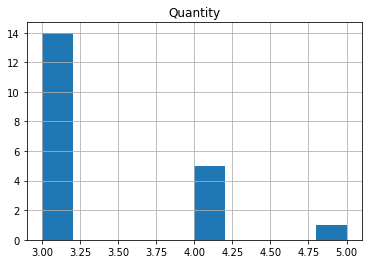

In [76]:
#b)
colunas = ['TrackName','Quantity']
histograma = invoice_items[colunas]
histograma = histograma.groupby('TrackName').sum()
histograma = histograma.sort_values(by='Quantity',ascending=False)
histogramaplot = histograma[0:20]
histogramaplot.hist()

In [78]:
#c)
lista = []
for x in artists['Name']:
    lista1 = []
    for r in tracks.index:
        if str(x) in str(tracks.loc[r,'Composer']):
            lista1.append(tracks.loc[r,'Name'])
    if lista1 != []:
        lista.append((x,lista1))
dicionario = dict(lista)

Auto-avaliação (1 ponto):    
Escreva sua auto-avaliação (mínimo de 3 linhas) e atribua a esta um valor entre 0 e 1, levando em consideração o aproveitamento na disciplina.    

### Escreva aqui

Foi incrível ter aula com você professor, realmente demais. Foi maravilhoso aprender uma nova linguagem e todas suas funcionalidades, alem de meu mundo de conhecimento e perspectivas crescer mais a cada aula. As aulas foram muito boas do início ao fim, e achei muito dinâmico e divertido todos os trabalhos que você deu: URI, Jogos_Vorazes e Trabalho sobre linguagens. Mostrou que programar pode ser realmente divertido, e possibilitou o aprendizado de pelo menos um pouco de muitas linguagens de programação. Gostaria de fazer uma sugestão em relação as suas aulas professor: É divertido demais você fugir um pouco do assunto da aula pra mostrar coisas e fatos interessantes, mas acho que pode ser um pouco melhor você se programar pra não fugir do assunto por muito tempo, possibilitando passar mais matéria pra todos os seus alunos. Assim, poderemos ter mais facilidade com as questões de programação, e (falando por mim) talvez não sentiria tanta dificuldade igual senti fazendo o exercício 6 dessa prova. Em geral, amei ter aula com você professor <3 (Suas figurinhas são demais, hehe)
Aprendi muita coisa mesmo, minha evolução como programador foi excelente, acho que poderia ter me dedicado mais e aprendido mais coisas, mas mesmo assim, fiquei feliz com meu aprendizado. Por isso minha autoavaliação entre 0 e 1 é 0.9.
Muito Obrigado!!!!!